<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [8]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [9]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

In [23]:
numeric_cols = [col for col in important_cols if col not in ['ISO_code', 'countries', 'region']]
pandas.DataFrame(
    [(dataset[col].min(), dataset[col].max(), dataset[col].max()-dataset[col].min()) for col in numeric_cols],
    index=numeric_cols, columns=['min', 'max', 'range']
)

,min,max,range
year,2008.000000,2016.000000,8.000000
pf_identity_legal,0.000000,10.000000,10.000000
pf_identity_parental_marriage,0.000000,10.000000,10.000000
pf_identity_parental_divorce,0.000000,10.000000,10.000000
pf_identity_parental,0.000000,10.000000,10.000000
pf_identity_sex_male,0.000000,10.000000,10.000000
pf_identity_sex_female,0.000000,10.000000,10.000000
pf_identity_sex,0.000000,10.000000,10.000000
pf_identity_divorce,0.000000,10.000000,10.000000
pf_identity,0.000000,10.000000,10.000000


In [43]:
dataset['studied_region'] = dataset['region'].apply(lambda x: 'World' if x != 'Latin America & the Caribbean' else x)
regions = set(dataset['studied_region'])

print('----------- pf_identity ------------')
pandas.DataFrame({
    region: {
        'mean': dataset[dataset['studied_region'] == region]['pf_identity'].mean(),
        'median': dataset[dataset['studied_region'] == region]['pf_identity'].median(),
        'std': dataset[dataset['studied_region'] == region]['pf_identity'].std(),
#         'mode': dataset[dataset['studied_region'] == region]['pf_identity'].mode()
    } for region in regions
})

----------- pf_identity ------------


,Latin America & the Caribbean,World
mean,8.765086,7.044503
median,10.000000,8.333333
std,1.711732,3.303771


In [28]:
print('----------- hf_score ------------')
pandas.DataFrame({
    region: {
        'mean': dataset[dataset['studied_region'] == region]['hf_score'].mean(),
        'median': dataset[dataset['studied_region'] == region]['hf_score'].median(),
        'std': dataset[dataset['studied_region'] == region]['hf_score'].std()
    } for region in regions
})

----------- hf_score ------------


,Latin America & the Caribbean,World
mean,7.047982,6.982403
median,7.028045,6.867191
std,0.608904,1.090861


Podría armsarse un scatterplot para comparar pf_identity con hf_score, y ef_score con hf_score.

Plantear sacarlos valores no numéricos del dataset antes de graficarlos.

Para ver outliers hacer boxplot que permite visualizar outliers fácilmente.

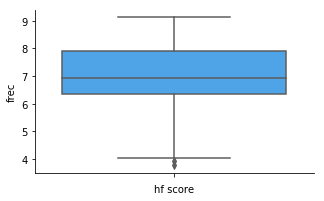

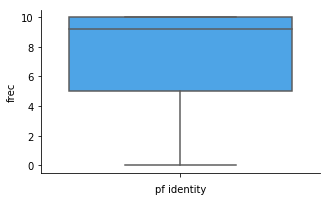

In [44]:
plt.figure(figsize=(5,3))
seaborn.boxplot(data=dataset,
               y='hf_score',
              color='#35A7FF' )
plt.ylabel('frec')
plt.xlabel('hf score')
plt.xticks(rotation=45)
seaborn.despine()
plt.figure(figsize=(5,3))
seaborn.boxplot(data=dataset,
               y='pf_identity',
              color='#35A7FF' )
plt.ylabel('frec')
plt.xlabel('pf identity')
plt.xticks(rotation=45)
seaborn.despine()

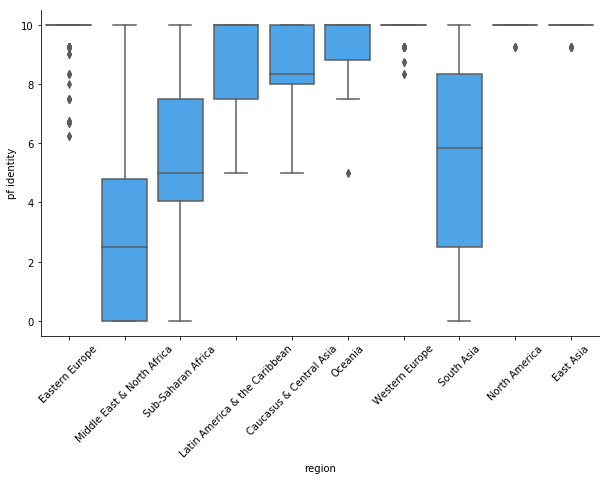

In [46]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
               x='region', y='pf_identity',
              color='#35A7FF' )
plt.ylabel('pf identity')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

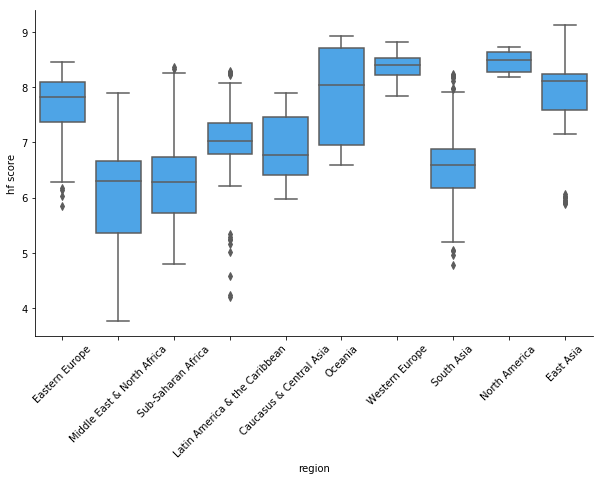

In [48]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
               x='region', y='hf_score',
              color='#35A7FF' )
plt.ylabel('hf score')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

Si, existen outliers como pueden observarse en los gráficos. Los boxplots anteriores permiten identificar fácilmente a los outliers para cada caso. 
En el caso de las globales, tenemos outliers sólo en hf_score y no en pf_identity, pero para el caso de los grupos, hay outliers en ambos índices aunque no en todas las regiones.

No los eliminaríamos, ya que estamos trabajando con un rango acotado de datos, y que por más que puedan ser valores atípicos, son valores reales y no errores.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

/home/dbourdin/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


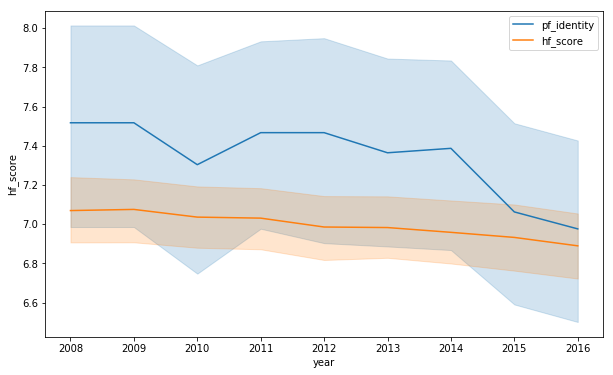

In [133]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', label='pf_identity')
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='hf_score')

/home/dbourdin/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


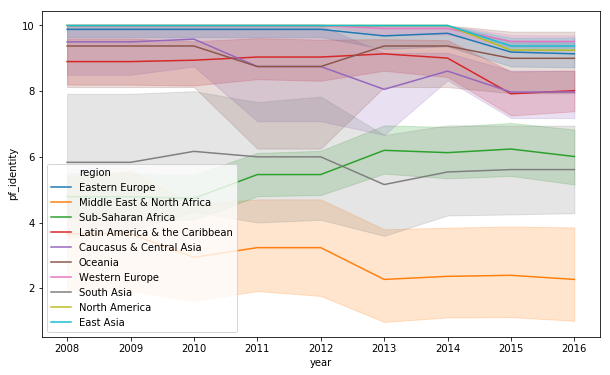

In [137]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', hue='region')

/home/dbourdin/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


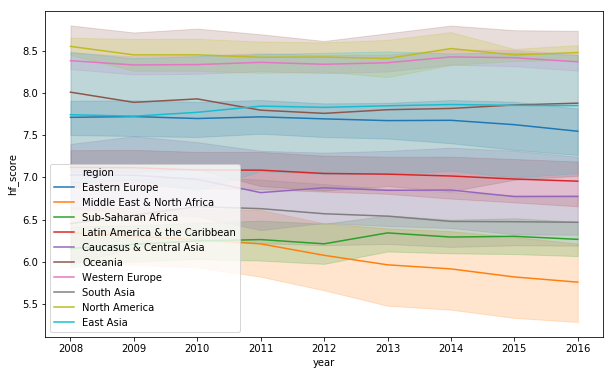

In [138]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region')

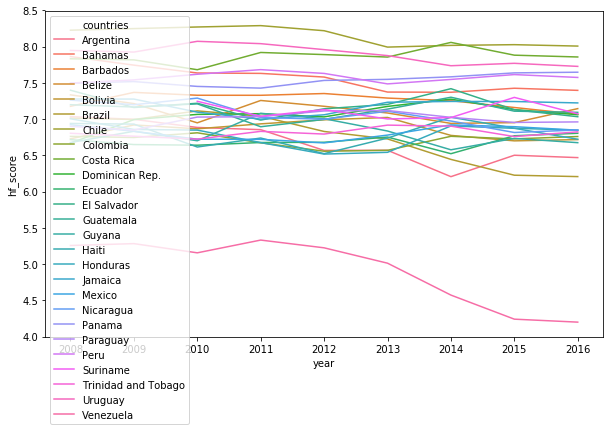

In [67]:
# Sacar venezuela de la comparación.
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'], x='year', y='hf_score', hue='countries')

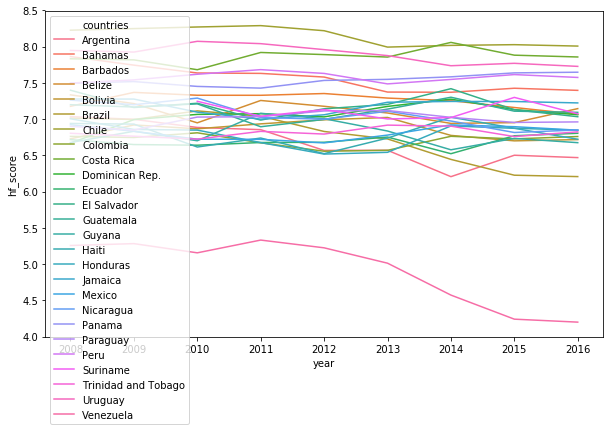

In [66]:
# Sacar venezuela de la comparación.
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'], x='year', y='pf_identity', hue='region')

Si analizamos globalmente se puede observar una tendencia negativa en las 2 variables, en cambio al separar por regiones, podemos observar que no todas siguen el mismo patrón. Algunas regiones mantienen sus índices e incluso crecen, cuando en el gráfico global no se observa la misma tendencia.

Al visualizar los gráficos, intentamos determinar aquellos países o regiones con tendencias más marcadas (tanto positivas, como negativas), para poder analizar esos casos por separado.

Sería interesante analizar la tendencia de las regiones o países que mejor se encuentran, para ver como es el comportamiento de estos índices, si tienden a crecer o decrecer.

/home/dbourdin/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


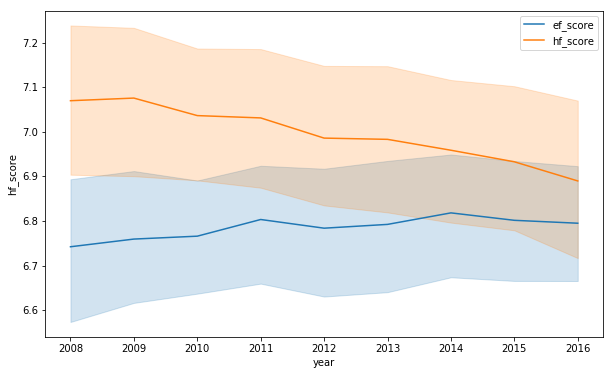

In [74]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='ef_score', label='ef_score')
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='hf_score')

La libertad humana abarca las libertades personal, civil, económica. Entonces, un incremento en la libertad económica, influencia positivamente a la libertad humana, pero si a su vez las demás libertades decrecen, la tendencia puede quedar estable o negativa.

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. [opcional] Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

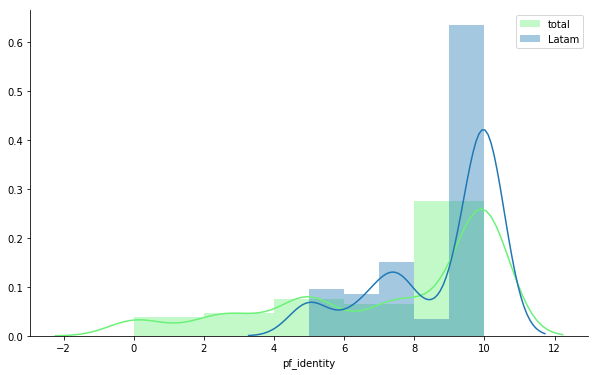

In [78]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=5, color='#6BF178', label='total')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), bins=5, label='Latam')
plt.legend()
seaborn.despine()

Podríamos eliminar valores que estén 2.5*std afuera de la media, como el ejemplo visto en clase.

def clean_salario_neto(dataset):
    """Returns the row with of dataset with Salario Neto values and without outliers."""
    salarios = dataset[NETO_COL]
    mask_salarios_outlier = (
        numpy.abs(salarios-salarios.mean()) <= (2.5*salarios.std())) & (salarios > 100)
    return dataset[mask_salarios_outlier]

In [84]:
stats.kstest(dataset['pf_identity'].dropna(), 'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [85]:
stats.kstest(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

Como el p-valor da 0 no podemos afirmar que pertenezca a una distribución normal.

In [86]:
loc, scale = stats.norm.fit(dataset['pf_identity'])
norm_dist = stats.norm(loc, scale)
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(salario_neto[NETO_COL], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(salario_neto[NETO_COL])), percs)

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
